In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import mne
import plotly.express as px
import pandas as pd

In [2]:
# Read HDF5 fi|le
eo_hf = h5py.File('eye open2023.11.29_10.56.28.hdf5', 'r')
ec_hf = h5py.File('eye closed2023.11.29_11.05.35.hdf5', 'r')

In [3]:
print(eo_hf.keys())
print(ec_hf.keys())

<KeysViewHDF5 ['AsynchronData', 'RawData', 'SavedFeatues', 'Version']>
<KeysViewHDF5 ['AsynchronData', 'RawData', 'SavedFeatues', 'Version']>


In [4]:
print(eo_hf.get('RawData').keys())
print(ec_hf.get('RawData').keys())

<KeysViewHDF5 ['AcquisitionTaskDescription', 'DAQDeviceCapabilities', 'DAQDeviceDescription', 'Samples', 'SessionDescription', 'SubjectDescription']>
<KeysViewHDF5 ['AcquisitionTaskDescription', 'DAQDeviceCapabilities', 'DAQDeviceDescription', 'Samples', 'SessionDescription', 'SubjectDescription']>


In [5]:
# Get data from eyes-open file and put into numpy array
eo_data = eo_hf.get('RawData/Samples')
eo_data_array = np.array(eo_data)
# Remove the first 5120 data points (10 sec)
eo_data_array = eo_data_array[5120:]

In [6]:
# Get data from eyes-closed file and put into numpy array
ec_data = ec_hf.get('RawData/Samples')
ec_data_array = np.array(ec_data)
# Remove the first 5120 data points (10 sec)
ec_data_array = ec_data_array[5120:]

In [7]:
eo_hf.close()
ec_hf.close()

In [8]:
eo_data_array

array([[17664.383 , 19512.479 ,  7186.6743, ..., 18629.377 , 18385.812 ,
         7922.5273],
       [17663.871 , 19512.336 ,  7186.2754, ..., 18631.754 , 18384.611 ,
         7921.8794],
       [17663.451 , 19512.293 ,  7186.046 , ..., 18634.19  , 18383.691 ,
         7921.477 ],
       ...,
       [18483.996 , 22342.496 ,  6976.607 , ..., 11882.599 , 23643.191 ,
        13411.829 ],
       [18483.41  , 22341.92  ,  6976.5234, ..., 11880.864 , 23643.34  ,
        13411.912 ],
       [18482.75  , 22341.213 ,  6976.2944, ..., 11879.118 , 23643.102 ,
        13411.748 ]], dtype=float32)

In [9]:
print(eo_data_array.shape)
print(ec_data_array.shape)

(179218, 15)
(179218, 15)


In [10]:
eo_data_array = np.divide(eo_data_array.T,1e6)
ec_data_array = np.divide(ec_data_array.T,1e6)

In [11]:
# Load data into an MNE RawArray object
ch_names = ['Channel' + str(i + 1) for i in range(eo_data_array.shape[0])]
ch_types = ['eeg' for i in range(eo_data_array.shape[0])]
sfreq = 512
eeg_info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
eo_raw_eeg = mne.io.RawArray(eo_data_array, eeg_info)
ec_raw_eeg = mne.io.RawArray(ec_data_array, eeg_info)

Creating RawArray with float64 data, n_channels=15, n_times=179218
    Range : 0 ... 179217 =      0.000 ...   350.033 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=179218
    Range : 0 ... 179217 =      0.000 ...   350.033 secs
Ready.


In [12]:
# Plot first two minute eyes opened raw EEG data with Plotly
eeg_df = eo_raw_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Eyes Opened Raw EEG Data from 15 Channels',
              labels={'value':u"\u03bcV"})

#fig.show()
#fig.write_html("raw_eeg.html")

In [13]:
# Plot first two minute eyes closed raw EEG data with Plotly
eeg_df = ec_raw_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Eyes Closed Raw EEG Data from 15 Channels',
              labels={'value':u"\u03bcV"})

#fig.show()
#fig.write_html("raw_eeg.html")

In [14]:
eeg_df.head()

,time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15
61441,120.001953,19227.497280,23282.591254,6198.984571,26658.056304,17433.952540,25552.382693,21901.112050,22084.798664,21480.361000,24908.198044,23476.094007,29943.622649,26370.843872,25551.328436,18246.801570
61442,120.003906,19225.196913,23280.566558,6197.044160,26655.703783,17432.590947,25551.501662,21899.057552,22082.339972,21478.276700,24907.598272,23474.304006,29940.381646,26367.899030,25548.437610,18243.663013
61443,120.005859,19222.702831,23278.370500,6194.900721,26653.133333,17431.041226,25550.443679,21896.855906,22079.607472,21475.922316,24906.912819,23472.450674,29936.870560,26364.849880,25545.414537,18240.576610
61444,120.007812,19220.087677,23276.068270,6192.618981,26650.400832,17429.310828,25549.203157,21894.574165,22076.649591,21473.340690,24906.123057,23470.569402,29933.191836,26361.778378,25542.283431,18237.587065
61445,120.009766,19217.446446,23273.749277,6190.282293,26647.595689,17427.440733,25547.802448,21892.296150,22073.561326,21470.608190,24905.234575,23468.725383,29929.468408,26358.790696,25539.111346,18234.761432


In [15]:
# Band-pass filter and notch filter
# Eyes opened
filtered_eo_eeg = (eo_raw_eeg.copy().filter(0.1, 30, fir_design='firwin'))
filtered_eo_eeg = filtered_eo_eeg.notch_filter(60, method='fir')
# Eyes closed
filtered_ec_eeg = (ec_raw_eeg.copy().filter(0.1, 30, fir_design='firwin'))
filtered_ec_eeg = filtered_ec_eeg.notch_filter(60, method='fir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16897 samples (33.002 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband 

In [16]:
# Plot bandpass and notch filtered data
# Eyes opened
eeg_df = filtered_eo_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Filtered Eyes Opened EEG Data from 15 Channels',
              labels={'value':u"\u03bcV"})

#fig.show()

In [17]:
# Eyes closed
eeg_df = filtered_ec_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Filtered Eyes Closed EEG Data from 15 Channels',
              labels={'value':u"\u03bcV"})

#fig.show()

In [18]:
eeg_df.head()

,time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15
61441,120.001953,62.763322,59.514889,66.665117,57.114398,49.359082,53.981395,53.424389,50.680072,50.199437,38.868181,33.428046,49.973237,22.211362,32.323332,31.830639
61442,120.003906,60.347611,57.387373,64.619100,54.606658,47.836191,52.925588,51.213694,48.065447,47.925266,38.082998,31.469299,46.606589,19.099663,29.328393,28.565019
61443,120.005859,57.743678,55.097686,62.360377,51.868509,46.112882,51.675419,48.859563,45.173696,45.366681,37.198929,29.454368,42.973870,15.901699,26.200731,25.337531
61444,120.007812,55.048332,52.732259,59.981662,48.994912,44.234785,50.268401,46.465231,42.090317,42.607326,36.239856,27.458601,39.193618,12.734586,22.984777,22.224613
61445,120.009766,52.378443,50.393608,57.594150,46.106526,42.273116,48.763686,44.145362,38.935416,39.763357,35.250643,25.570991,35.418162,9.729416,19.765089,19.319323


In [19]:
# Create ICA objects for eyes opened/closed data
# Eyes opened
eo_ica = mne.preprocessing.ICA(n_components=13, max_iter="auto", random_state=97)
eo_ica.fit(filtered_eo_eeg)


Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 4.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,23 iterations on raw data (179218 samples)
ICA components,13
Available PCA components,15
Channel types,eeg
ICA components marked for exclusion,—


In [20]:
# Eyes closed
ec_ica = mne.preprocessing.ICA(n_components=15, max_iter="auto", random_state=97)
ec_ica.fit(filtered_ec_eeg)

Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 82.0s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,469 iterations on raw data (179218 samples)
ICA components,15
Available PCA components,15
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=13, n_times=179218
    Range : 0 ... 179217 =      0.000 ...   350.033 secs
Ready.
Using matplotlib as 2D backend.


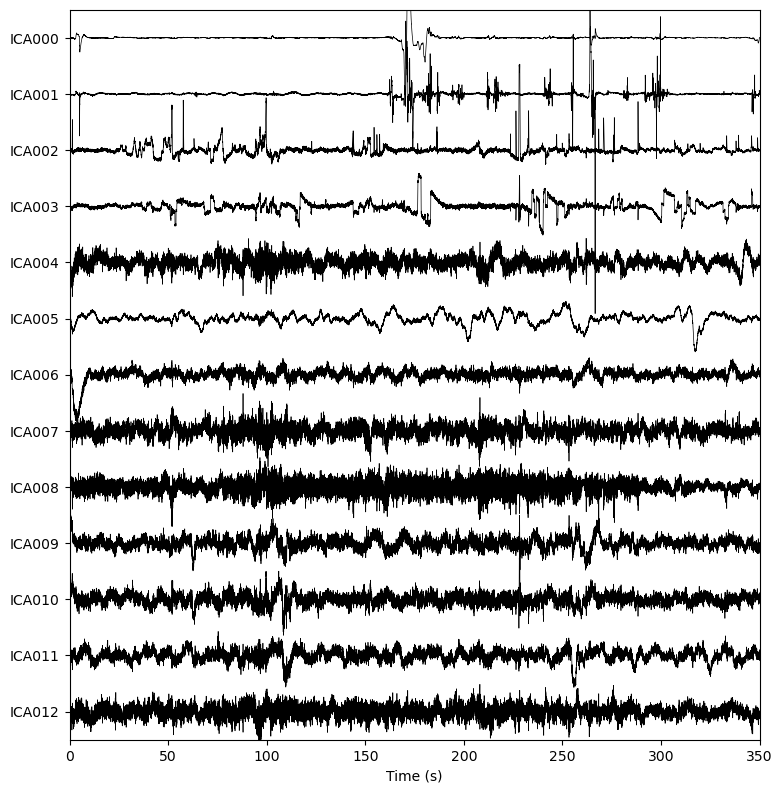

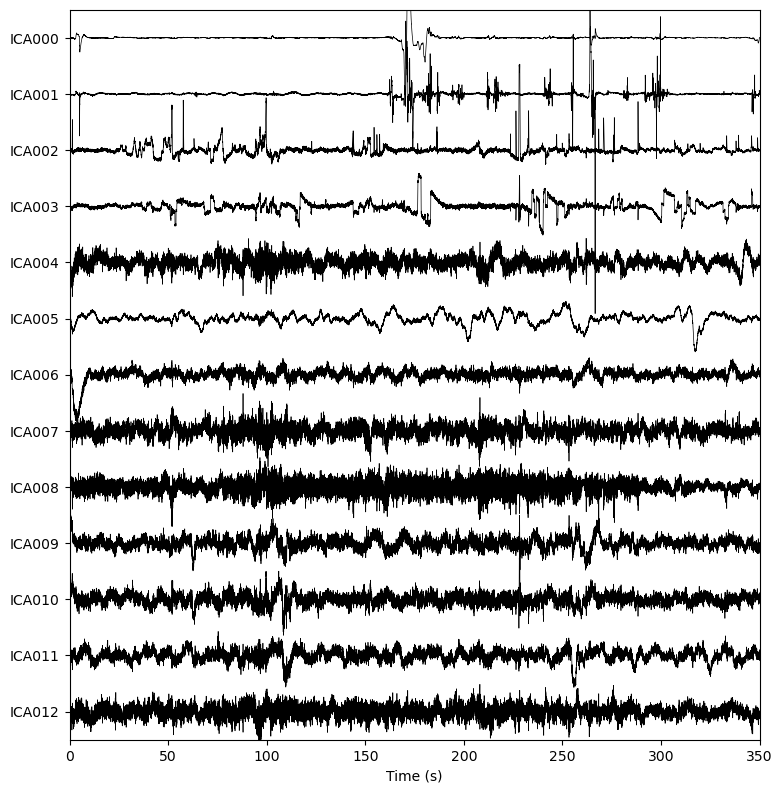

In [21]:
# Plot ICA components
# Eyes Opened
eo_ica.plot_sources(filtered_eo_eeg, show_scrollbars=False,start=0, stop=179217)
#ica.plot_sources(filtered_eeg, show_scrollbars=False,start=61440, stop=91260)

Creating RawArray with float64 data, n_channels=15, n_times=179218
    Range : 0 ... 179217 =      0.000 ...   350.033 secs
Ready.


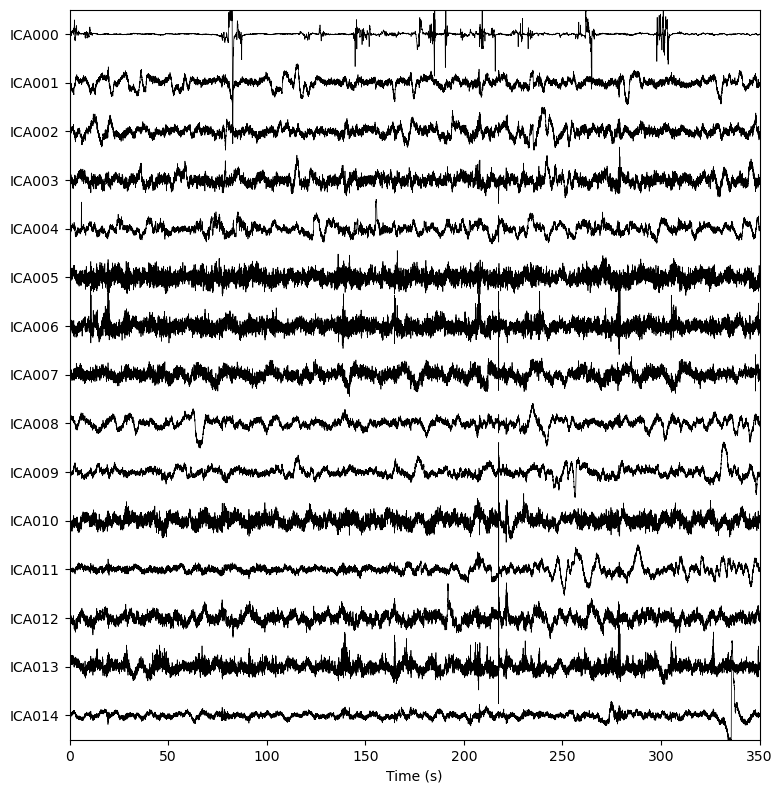

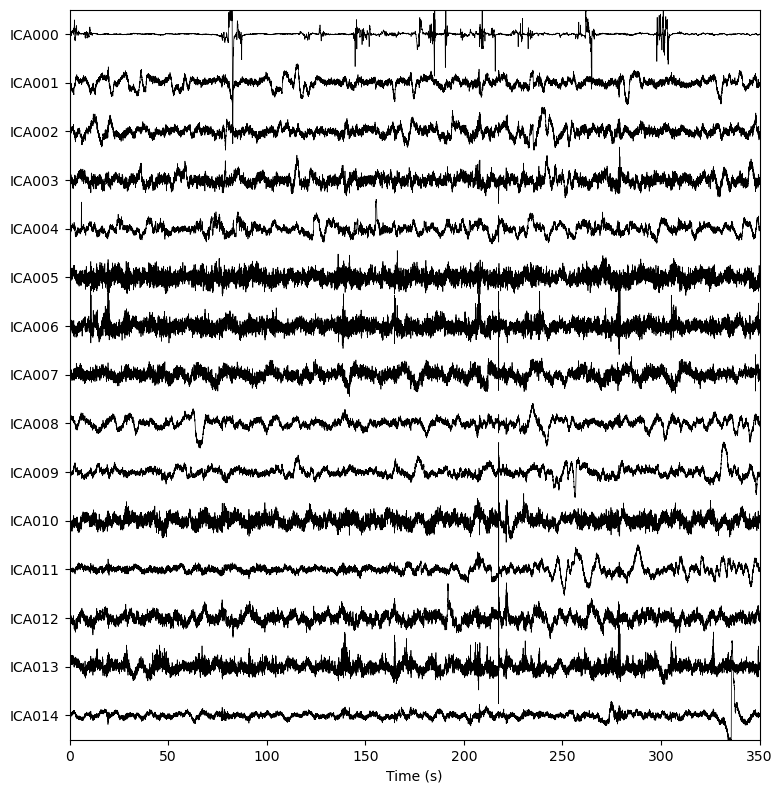

In [22]:
# Eyes Closed
ec_ica.plot_sources(filtered_ec_eeg, show_scrollbars=False,start=0, stop=179217)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 15 PCA components


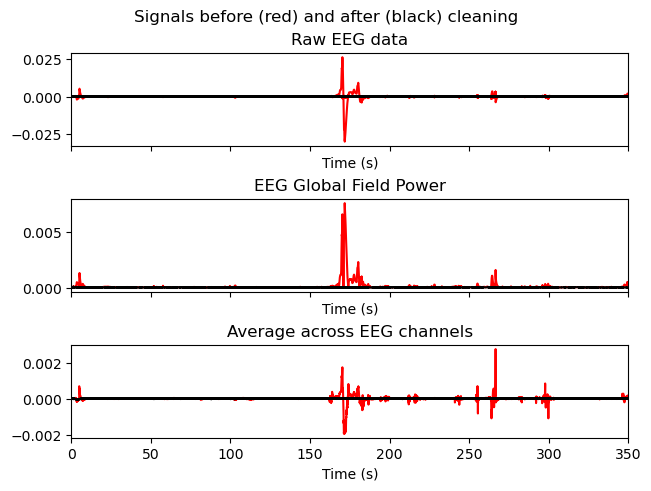

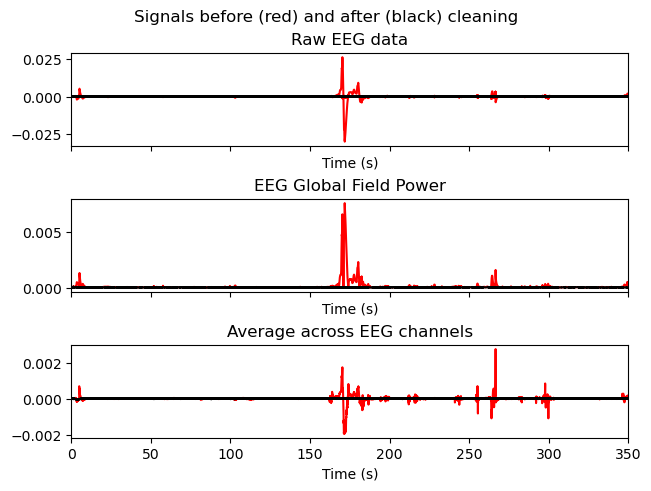

In [23]:
# Plot the result of excluding ICA components 0,1,2,3 for the eyes opened data
eo_ica.plot_overlay(filtered_eo_eeg, exclude=[0,1,2,3],start=0, stop=179217)

In [24]:
# Set the components to exclude
eo_ica.exclude = [0,1,2,3]

In [25]:
# Actually apply the removal on the filtered data
eo_icaed_eeg = filtered_eo_eeg.copy()
eo_ica.apply(eo_icaed_eeg)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 15 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,15 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.10 Hz
Lowpass,30.00 Hz


Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 15 PCA components


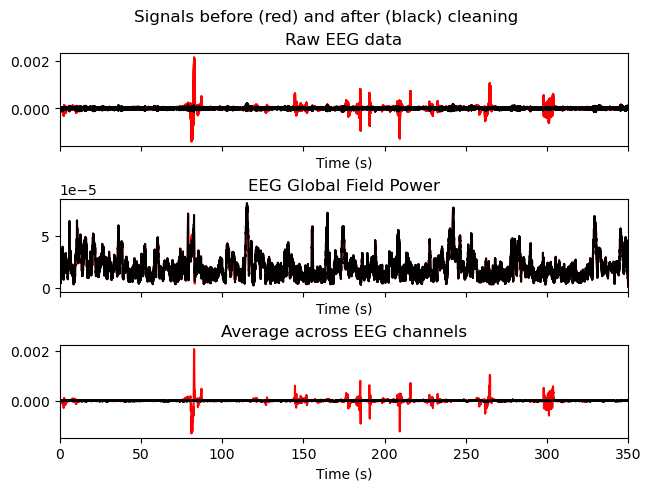

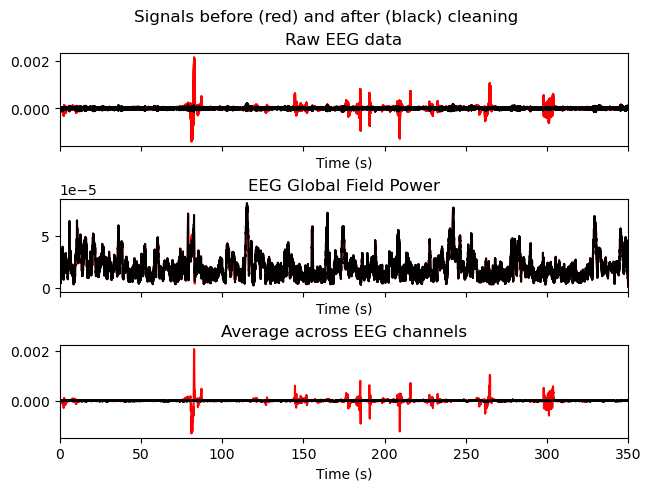

In [26]:
# Plot the result of excluding ICA component 0 for the eyes closed data
ec_ica.plot_overlay(filtered_ec_eeg, exclude=[0],start=0, stop=179217)

In [27]:
# Set the components to exclude
ec_ica.exclude = [0]

In [28]:
# Actually apply the removal on the filtered data
ec_icaed_eeg = filtered_ec_eeg.copy()
ec_ica.apply(ec_icaed_eeg)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 15 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,15 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.10 Hz
Lowpass,30.00 Hz


In [29]:
# Plot eyes opened data after artifacts removal
eeg_df = eo_icaed_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Eyes Opened EEG Data from 15 Channels After Artifacts Removal',
              labels={'value':u"\u03bcV"})

#fig.show()

In [30]:
# Plot eyes closed data after artifacts removal
eeg_df = ec_icaed_eeg.to_data_frame(scalings=1e6)
eeg_df = eeg_df[(eeg_df['time']>120) & (eeg_df['time']<240)]
fig = px.line(eeg_df, x="time", y=eeg_df.columns,
              title='Eyes Closed EEG Data from 15 Channels After Artifacts Removal',
              labels={'value':u"\u03bcV"})

#fig.show()

In [31]:
# There are two spectral estimation methods, Welch and Multitaper (uses DPSS tapers)
# Change n_fft for welch method to change the number of bins in each unit of frequency 
# n*icaed_eeg.info["sfreq"] -> n equal-width bins in each frequency
# Compute PSD for eyes opened data
eo_welch_psd = eo_icaed_eeg.compute_psd(method='welch',n_fft=int(20*eo_icaed_eeg.info["sfreq"]), fmin=0,fmax=30)
eo_multitaper_psd = eo_icaed_eeg.compute_psd(method='multitaper',fmin=0,fmax=30)

Effective window size : 20.000 (s)
    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\jimta\AppData\Local\Temp\ipykernel_4296\4178924536.py:6: RuntimeWarning:

Could not properly use low_bias, keeping lowest-bias taper



In [32]:
eo_welch_psd

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,15
Number of frequency bins,601
Frequency range,0.00 – 30.00 Hz


In [33]:
# Plot PSD of eyes opened data
welch_psd_df = eo_welch_psd.to_data_frame(copy=True)
# Scaling with 1e12 to micro-volt^2/Hz
for col in welch_psd_df.drop(['freq'],axis=1):
    welch_psd_df[col] = welch_psd_df[col]*1e12
eo_welch_psd_delta_df = welch_psd_df[(welch_psd_df['freq']>=0) & (welch_psd_df['freq']<30)]
eo_welch_psd_theta_df = welch_psd_df[(welch_psd_df['freq']>=3) & (welch_psd_df['freq']<7)]
eo_welch_psd_alpha_df = welch_psd_df[(welch_psd_df['freq']>=7) & (welch_psd_df['freq']<12)]
eo_welch_psd_beta_df = welch_psd_df[(welch_psd_df['freq']>=12) & (welch_psd_df['freq']<30)]



In [34]:
fig = px.line(eo_welch_psd_delta_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Opened PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [35]:
fig = px.line(eo_welch_psd_theta_df, x="freq", y=welch_psd_df.columns,
              title='Theta band Eyes Opened PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [36]:
fig = px.line(eo_welch_psd_alpha_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Opened PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [37]:
fig = px.line(eo_welch_psd_beta_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Opened PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [38]:
eo_multitaper_psd_df = eo_multitaper_psd.to_data_frame(copy=True)
eo_multitaper_psd_df = eo_multitaper_psd_df[(eo_multitaper_psd_df['freq']>=0) & (eo_multitaper_psd_df['freq']<3)]
# Scaling with 1e12 to micro-volt^2/Hz
for col in eo_multitaper_psd_df.drop(['freq'],axis=1):
    eo_multitaper_psd_df[col] = eo_multitaper_psd_df[col]*1e12
fig = px.line(eo_multitaper_psd_df, x="freq", y=eo_multitaper_psd_df.columns,
              title='Delta band PSD with multitaper method from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [39]:
# Compute PSD for eyes closed data
ec_welch_psd = ec_icaed_eeg.compute_psd(method='welch',n_fft=int(20*ec_icaed_eeg.info["sfreq"]), fmin=0,fmax=30)
ec_multitaper_psd = ec_icaed_eeg.compute_psd(method='multitaper',fmin=0,fmax=30)

Effective window size : 20.000 (s)
    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\jimta\AppData\Local\Temp\ipykernel_4296\358500997.py:3: RuntimeWarning:

Could not properly use low_bias, keeping lowest-bias taper



In [40]:
# Plot PSD of eyes closed data
welch_psd_df = ec_welch_psd.to_data_frame(copy=True)
# Scaling with 1e12 to micro-volt^2/Hz
for col in welch_psd_df.drop(['freq'],axis=1):
    welch_psd_df[col] = welch_psd_df[col]*1e12
ec_welch_psd_delta_df = welch_psd_df[(welch_psd_df['freq']>=0) & (welch_psd_df['freq']<3)]
ec_welch_psd_theta_df = welch_psd_df[(welch_psd_df['freq']>=3) & (welch_psd_df['freq']<7)]
ec_welch_psd_alpha_df = welch_psd_df[(welch_psd_df['freq']>=7) & (welch_psd_df['freq']<12)]
ec_welch_psd_beta_df = welch_psd_df[(welch_psd_df['freq']>=12) & (welch_psd_df['freq']<30)]

In [41]:
fig = px.line(ec_welch_psd_delta_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Closed PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [42]:
fig = px.line(ec_welch_psd_theta_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Closed PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [43]:
fig = px.line(ec_welch_psd_alpha_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Closed PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [44]:
fig = px.line(ec_welch_psd_beta_df, x="freq", y=welch_psd_df.columns,
              title='Delta band Eyes Closed PSD from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()

In [45]:
ec_multitaper_psd_df = ec_multitaper_psd.to_data_frame(copy=True)
ec_multitaper_psd_df = ec_multitaper_psd_df[(ec_multitaper_psd_df['freq']>=0) & (ec_multitaper_psd_df['freq']<3)]
# Scaling with 1e12 to micro-volt^2/Hz
for col in ec_multitaper_psd_df.drop(['freq'],axis=1):
    ec_multitaper_psd_df[col] = ec_multitaper_psd_df[col]*1e12
fig = px.line(ec_multitaper_psd_df, x="freq", y=ec_multitaper_psd_df.columns,
              title='Delta band PSD with multitaper method from 15 Channels',
              labels={'value':u"\u03bcV<sup>2</sup>/Hz"})

#fig.show()